# SetUP

In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/cleanData/rawMAT/humanBrain_1k_PFCV1_merge/")

In [2]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(ggplot2)
library(edgeR)
library(RColorBrewer)
library(GenomicRanges)
library(ComplexHeatmap)
library(Signac)
library(Seurat)
#library(rtracklayer)
#library(igraph)
})

In [3]:
mySubMat <- function(seq=seq,s=s,e=e,mat,res=res,...){
    dat <- mat%>% filter(seqnames==seq,V1>=s,V2<=e)%>% 
mutate(idl=((V1-s)/res)+1,idr=((V2-s)/res)+1)
    d <- max(dat$idr)
    plotDF <- matrix(0,nrow = d,ncol = d)
    for(i in 1:dim(dat)[1]){
    id1 <- dat[i,5]
    id2 <- dat[i,6]
    score <- dat[i,3]
    plotDF[id1,id2] <- score
    plotDF[id2,id1] <- score
}
return(plotDF)
}

# LoadData

In [348]:
hRG.500 <- lapply(1:22,function(idx){
    read.table(paste0("./RG.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/RG.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.500kb.mat")) %>%
    mutate(seqnames=idx) 
})
hiPC.500 <- lapply(1:22,function(idx){
    read.table(paste0("./iPC.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/iPC.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.500kb.mat")) %>%
    mutate(seqnames=idx) 
})
heN.500 <- lapply(1:22,function(idx){
    read.table(paste0("./eN.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/eN.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.500kb.mat")) %>%
    mutate(seqnames=idx) 
})
hiN.500 <- lapply(1:22,function(idx){
    read.table(paste0("./iN.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/iN.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.500kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [349]:
hRG.500.mat <- do.call(rbind,hRG.500) %>% mutate(seqnames=paste0("chr",seqnames))
hiPC.500.mat <- do.call(rbind,hiPC.500) %>% mutate(seqnames=paste0("chr",seqnames))
heN.500.mat <- do.call(rbind,heN.500) %>% mutate(seqnames=paste0("chr",seqnames))
hiN.500.mat <- do.call(rbind,hiN.500) %>% mutate(seqnames=paste0("chr",seqnames))

In [15]:
saveRDS(hRG.500.mat,"./humanBrain_PFCV1_1K_RG.500.raw.mat.RDS")
saveRDS(hiPC.500.mat,"./humanBrain_PFCV1_1K_iPC.500.raw.mat.RDS")
saveRDS(heN.500.mat,"./humanBrain_PFCV1_1K_eN.500.raw.mat.RDS")
saveRDS(hiN.500.mat,"./humanBrain_PFCV1_1K_iN.500.raw.mat.RDS")

In [41]:
hRG.50 <- lapply(c(14),function(idx){
    read.table(paste0("./RG.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/RG.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
hiPC.50 <- lapply(c(14),function(idx){
    read.table(paste0("./iPC.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/iPC.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
heN.50 <- lapply(c(14),function(idx){
    read.table(paste0("./eN.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/eN.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
hiN.50 <- lapply(c(14),function(idx){
    read.table(paste0("./iN.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/iN.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [42]:
hRG.50.mat <- do.call(rbind,hRG.50) %>% mutate(seqnames=paste0("chr",seqnames))
hiPC.50.mat <- do.call(rbind,hiPC.50) %>% mutate(seqnames=paste0("chr",seqnames))
heN.50.mat <- do.call(rbind,heN.50) %>% mutate(seqnames=paste0("chr",seqnames))
hiN.50.mat <- do.call(rbind,hiN.50) %>% mutate(seqnames=paste0("chr",seqnames))

In [5]:
saveRDS(hRG.50.mat,"../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_RG.50.raw.mat.RDS")
saveRDS(heN.50.mat,"../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_eN.50.raw.mat.RDS")

In [4]:
hRG.50.mat <- readRDS("../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_RG.50.raw.mat.RDS")
heN.50.mat <- readRDS("../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_eN.50.raw.mat.RDS")

In [6]:
saveRDS(hiPC.50.mat,"../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_iPC.50.raw.mat.RDS")
saveRDS(hiN.50.mat,"../../../cleanData/rawMAT/humanBrain_1k_PFCV1_merge/humanBrain_PFCV1_1K_iN.50.raw.mat.RDS")

In [160]:
hRG.50.mat.oe <- do.call(rbind,hRG.50.oe) %>% mutate(seqnames=paste0("chr",seqnames))
hiPC.50.mat.oe <- do.call(rbind,hiPC.50.oe) %>% mutate(seqnames=paste0("chr",seqnames))
heN.50.mat.oe <- do.call(rbind,heN.50.oe) %>% mutate(seqnames=paste0("chr",seqnames))
hiN.50.mat.oe <- do.call(rbind,hiN.50.oe) %>% mutate(seqnames=paste0("chr",seqnames))

In [43]:
hRG.50.mat <- hRG.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
#hiPC.50.mat <- hiPC.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
#mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
heN.50.mat <- heN.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
#hiN.50.mat <- hiN.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
#mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data
  frame and adjust accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data
  frame and adjust accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


In [59]:
hRG.20 <- lapply(2,function(idx){
    read.table(paste0("./RG.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/RG.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.20kb.mat")) %>%
    mutate(seqnames=idx) 
})
hiPC.20 <- lapply(2,function(idx){
    read.table(paste0("./iPC.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/iPC.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.20kb.mat")) %>%
    mutate(seqnames=idx) 
})
heN.20 <- lapply(2,function(idx){
    read.table(paste0("./eN.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/eN.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.20kb.mat")) %>%
    mutate(seqnames=idx) 
})
hiN.20 <- lapply(2,function(idx){
    read.table(paste0("./iN.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/iN.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.20kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [60]:
hRG.20.mat <- do.call(rbind,hRG.20) %>% mutate(seqnames=paste0("chr",seqnames))
hiPC.20.mat <- do.call(rbind,hiPC.20) %>% mutate(seqnames=paste0("chr",seqnames))
heN.20.mat <- do.call(rbind,heN.20) %>% mutate(seqnames=paste0("chr",seqnames))
hiN.20.mat <- do.call(rbind,hiN.20) %>% mutate(seqnames=paste0("chr",seqnames))

In [61]:
hRG.20.mat <- hRG.20.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
hiPC.20.mat <- hiPC.20.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
heN.20.mat <- heN.20.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
hiN.20.mat <- hiN.20.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data
  frame and adjust accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data
  frame and adjust accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns 

# 500kb

In [350]:
allMat <- function (seq = seq, mat, res = res, ...){
    dat <- mat %>% filter(seqnames == seq) %>% 
        mutate(idl = ((V1)/res) + 1, idr = ((V2)/res) + 
            1)
    d <- max(dat$idr)
    plotDF <- matrix(0, nrow = d, ncol = d)
    for (i in 1:dim(dat)[1]) {
        id1 <- dat[i, 5]
        id2 <- dat[i, 6]
        score <- dat[i, 3]
        plotDF[id1, id2] <- score
        plotDF[id2, id1] <- score
    }
    return(plotDF)
}

In [351]:
RG.chr13.500 <- allMat("chr13",hRG.500.mat,res=500000)
iPC.chr13.500 <- allMat("chr13",hiPC.500.mat,res=500000)
eN.chr13.500 <- allMat("chr13",heN.500.mat,res=500000)
iN.chr13.500 <- allMat("chr13",hiN.500.mat,res=500000)

In [352]:
RG.chr13.500 <- RG.chr13.500/sum(RG.chr13.500) * 7000000
iPC.chr13.500 <- iPC.chr13.500/sum(iPC.chr13.500) * 7000000
eN.chr13.500 <- eN.chr13.500/sum(eN.chr13.500) * 7000000
iN.chr13.500 <- iN.chr13.500/sum(iN.chr13.500) * 7000000

In [353]:
quantile(RG.chr13.500,.98)

98% 
1161.103

In [354]:
RG.chr13.500[RG.chr13.500 >=1000] <- 1000
iPC.chr13.500[iPC.chr13.500 >=1000] <- 1000
eN.chr13.500[eN.chr13.500 >=1000] <- 1000
iN.chr13.500[iN.chr13.500 >=1000] <- 1000

In [356]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr13.500kb.legend:0-1000.pdf",width = 1,height = 1)
Heatmap(RG.chr13.500,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr13.500kb.legend:0-1000.pdf",width = 1,height = 1)
Heatmap(iPC.chr13.500,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr13.500kb.legend:0-1000.pdf",width = 1,height = 1)
Heatmap(eN.chr13.500,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr13.500kb.legend:0-1000.pdf",width = 1,height = 1)
Heatmap(iN.chr13.500,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

# 50kb

## chr14

In [56]:
RG.chr13.50 <- mySubMat("chr14",81000000,89000000,hRG.50.mat,res=50000)
#iPC.chr13.50 <- mySubMat("chr13",50000000,65000000,hiPC.50.mat,res=50000)
eN.chr13.50 <- mySubMat("chr14",81000000,89000000,heN.50.mat,res=50000)
#iN.chr13.50 <- mySubMat("chr13",50000000,65000000,hiN.50.mat,res=50000)

In [52]:
quantile(RG.chr13.50,.95)

95% 
43.72357

In [57]:
RG.chr13.50[RG.chr13.50>45] <- 45
#iPC.chr13.50[iPC.chr13.50>30] <- 30
eN.chr13.50[eN.chr13.50>45] <- 45
#iN.chr13.50[iN.chr13.50>30] <- 30

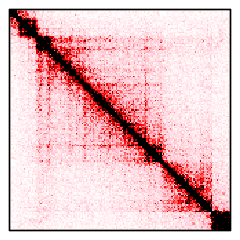

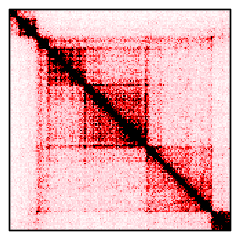

In [58]:
options(repr.plot.width=2,repr.plot.height=2)
Heatmap(RG.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(eN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

## chr16

In [17]:
RG.chr13.50 <- mySubMat("chr16",57000000,68000000,hRG.50.mat,res=50000)
#iPC.chr13.50 <- mySubMat("chr13",50000000,65000000,hiPC.50.mat,res=50000)
eN.chr13.50 <- mySubMat("chr16",57000000,68000000,heN.50.mat,res=50000)
#iN.chr13.50 <- mySubMat("chr13",50000000,65000000,hiN.50.mat,res=50000)

In [18]:
RG.chr13.50[RG.chr13.50>30] <- 30
#iPC.chr13.50[iPC.chr13.50>30] <- 30
eN.chr13.50[eN.chr13.50>30] <- 30
#iN.chr13.50[iN.chr13.50>30] <- 30

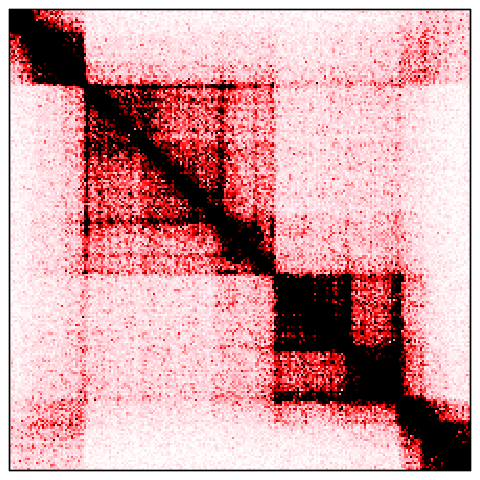

In [19]:
options(repr.plot.width=4,repr.plot.height=4)
Heatmap(eN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

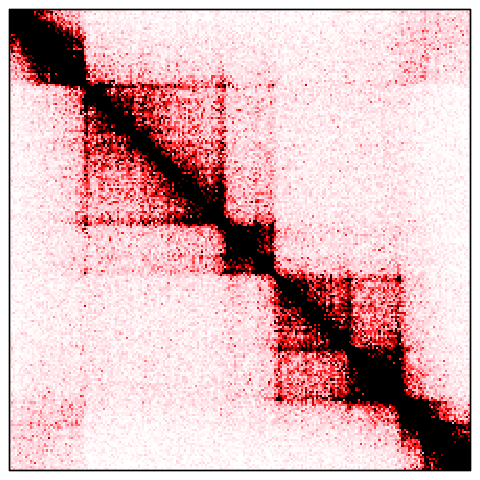

In [20]:
Heatmap(RG.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

In [84]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(RG.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iPC.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(eN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

## chr13

In [60]:
RG.chr13.50 <- mySubMat("chr13",50000000,65000000,hRG.50.mat,res=50000)
iPC.chr13.50 <- mySubMat("chr13",50000000,65000000,hiPC.50.mat,res=50000)
eN.chr13.50 <- mySubMat("chr13",50000000,65000000,heN.50.mat,res=50000)
iN.chr13.50 <- mySubMat("chr13",50000000,65000000,hiN.50.mat,res=50000)

In [83]:
RG.chr13.50[RG.chr13.50>30] <- 30
iPC.chr13.50[iPC.chr13.50>30] <- 30
eN.chr13.50[eN.chr13.50>30] <- 30
iN.chr13.50[iN.chr13.50>30] <- 30

In [84]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(RG.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iPC.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(eN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [23]:
RG.chr13.50 <- mySubMat("chr13",83700000,93700000,hRG.50.mat,res=50000)
iPC.chr13.50 <- mySubMat("chr13",83700000,93700000,hiPC.50.mat,res=50000)
eN.chr13.50 <- mySubMat("chr13",83700000,93700000,heN.50.mat,res=50000)
iN.chr13.50 <- mySubMat("chr13",83700000,93700000,hiN.50.mat,res=50000)

In [47]:
RG.chr13.50.oe <- mySubMat("chrX",83700000,93700000,hRG.50.mat.oe,res=50000)
iPC.chr13.50.oe <- mySubMat("chrX",83700000,93700000,hiPC.50.mat.oe,res=50000)
eN.chr13.50.oe <- mySubMat("chrX",83700000,93700000,heN.50.mat.oe,res=50000)
iN.chr13.50.oe <- mySubMat("chrX",83700000,93700000,hiN.50.mat.oe,res=50000)

In [24]:
RG.chr13.50[RG.chr13.50>40] <- 40
iPC.chr13.50[iPC.chr13.50>40] <- 40
eN.chr13.50[eN.chr13.50>40] <- 40
iN.chr13.50[iN.chr13.50>40] <- 40

In [61]:
RG.chr13.50.oe[RG.chr13.50.oe>5] <- 5
iPC.chr13.50.oe[iPC.chr13.50.oe>5] <- 5
eN.chr13.50.oe[eN.chr13.50.oe>5] <- 5
iN.chr13.50.oe[iN.chr13.50.oe>5] <- 5

In [25]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.50kb:83.7-93.7Mb.legend:0-40.pdf",width = 1.3,height = 1.3)
Heatmap(RG.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.50kb:83.7-93.7Mb.legend:0-40.pdf",width = 1.3,height = 1.3)
Heatmap(iPC.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.50kb:83.7-93.7Mb.legend:0-40.pdf",width = 1.3,height = 1.3)
Heatmap(eN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.50kb:83.7-93.7Mb.legend:0-40.pdf",width = 1.3,height = 1.3)
Heatmap(iN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [53]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.50kb:83.7-93.7Mb.legend:OE0-4.pdf",width = 1.3,height = 1.3)
Heatmap(RG.chr13.50.oe,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("navy","white","red"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.50kb:83.7-93.7Mb.legend:OE0-4.pdf",width = 1.3,height = 1.3)
Heatmap(iPC.chr13.50.oe,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("navy","white","red"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.50kb:83.7-93.7Mb.legend:OE0-4.pdf",width = 1.3,height = 1.3)
Heatmap(eN.chr13.50.oe,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("navy","white","red"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.50kb:83.7-93.7Mb.legend:OE0-4.pdf",width = 1.3,height = 1.3)
Heatmap(iN.chr13.50.oe,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("navy","white","red"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

## marker gene

### VIM: chr10:17.2

In [325]:
RG.vim.50 <- mySubMat("chr10",15000000,19000000,hRG.50.mat,res=50000)
iPC.vim.50 <- mySubMat("chr10",15000000,19000000,hiPC.50.mat,res=50000)
eN.vim.50 <- mySubMat("chr10",15000000,19000000,heN.50.mat,res=50000)
iN.vim.50 <- mySubMat("chr10",15000000,19000000,hiN.50.mat,res=50000)

In [333]:
RG.vim.50[RG.vim.50 >=100] <- 100
eN.vim.50[eN.vim.50 >=100] <- 100
iPC.vim.50[iPC.vim.50 >=100] <- 100
iN.vim.50[iN.vim.50 >=100] <- 100

In [334]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr10.50kb:15-19Mb.VIM.legend:0-100.pdf",width = 2,height = 2)
Heatmap(RG.vim.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr10.50kb:15-19Mb.VIM.legend:0-100.pdf",width = 2,height = 2)
Heatmap(iPC.vim.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr10.50kb:15-19Mb.VIM.legend:0-100.pdf",width = 2,height = 2)
Heatmap(eN.vim.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr10.50kb:15-19Mb.VIM.legend:0-100.pdf",width = 2,height = 2)
Heatmap(iN.vim.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

### SOX2: chr3:181,427,712-181,431,712

In [90]:
RG.sox2.50 <- mySubMat("chr3",179000000,183000000,hRG.50.mat,res=50000)
iPC.sox2.50 <- mySubMat("chr3",179000000,183000000,hiPC.50.mat,res=50000)
eN.sox2.50 <- mySubMat("chr3",179000000,183000000,heN.50.mat,res=50000)
iN.sox2.50 <- mySubMat("chr3",179000000,183000000,hiN.50.mat,res=50000)

In [91]:
RG.sox2.50[RG.sox2.50 >=40] <- 40
eN.sox2.50[eN.sox2.50 >=40] <- 40
iPC.sox2.50[iPC.sox2.50 >=40] <- 40
iN.sox2.50[iN.sox2.50 >=40] <- 40

In [92]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.50kb:179-183Mb.SOX2.legend:0-40.pdf",width = 2,height = 2)
Heatmap(RG.sox2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.50kb:179-183Mb.SOX2.legend:0-40.pdf",width = 2,height = 2)
Heatmap(iPC.sox2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.50kb:179-183Mb.SOX2.legend:0-40.pdf",width = 2,height = 2)
Heatmap(eN.sox2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.50kb:179-183Mb.SOX2.legend:0-40.pdf",width = 2,height = 2)
Heatmap(iN.sox2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [92]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.50kb:179-183Mb.SOX2.legend:0-40.pdf",width = 2,height = 2)
Heatmap(RG.sox2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.50kb:179-183Mb.SOX2.legend:0-40.pdf",width = 2,height = 2)
Heatmap(iPC.sox2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.50kb:179-183Mb.SOX2.legend:0-40.pdf",width = 2,height = 2)
Heatmap(eN.sox2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.50kb:179-183Mb.SOX2.legend:0-40.pdf",width = 2,height = 2)
Heatmap(iN.sox2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

### SATB2: chr2:200Mb

In [101]:
RG.satb2.50 <- mySubMat("chr2",188000000,202000000,hRG.50.mat,res=50000)
iPC.satb2.50 <- mySubMat("chr2",188000000,202000000,hiPC.50.mat,res=50000)
eN.satb2.50 <- mySubMat("chr2",188000000,202000000,heN.50.mat,res=50000)
iN.satb2.50 <- mySubMat("chr2",188000000,202000000,hiN.50.mat,res=50000)

In [102]:
RG.satb2.50[RG.satb2.50 >=15] <- 15
eN.satb2.50[eN.satb2.50 >=15] <- 15
iPC.satb2.50[iPC.satb2.50 >=15] <- 15
iN.satb2.50[iN.satb2.50 >=15] <- 15

In [105]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr2.50kb:188-202Mb.SATB2.legend:0-15.pdf",width = 2,height = 2)
Heatmap(RG.satb2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.50kb:188-202Mb.SATB2.legend:0-15.pdf",width = 2,height = 2)
Heatmap(iPC.satb2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.50kb:188-202Mb.SATB2.legend:0-15.pdf",width = 2,height = 2)
Heatmap(eN.satb2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.50kb:188-202Mb.SATB2.legend:0-15.pdf",width = 2,height = 2)
Heatmap(iN.satb2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

### SSTR2: chr17:71.1Mb

In [129]:
RG.sstr2.50 <- mySubMat("chr17",69000000,73000000,hRG.50.mat,res=50000)
iPC.sstr2.50 <- mySubMat("chr17",69000000,73000000,hiPC.50.mat,res=50000)
eN.sstr2.50 <- mySubMat("chr17",69000000,73000000,heN.50.mat,res=50000)
iN.sstr2.50 <- mySubMat("chr17",69000000,73000000,hiN.50.mat,res=50000)

In [135]:
RG.sstr2.50[RG.sstr2.50 >=300] <- 300
eN.sstr2.50[eN.sstr2.50 >=300] <- 300
iPC.sstr2.50[iPC.sstr2.50 >=300] <- 300
iN.sstr2.50[iN.sstr2.50 >=300] <- 300

In [138]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr17.50kb:69-73Mb.SSTR2.legend:0-300.pdf",width = 2,height = 2)
Heatmap(RG.sstr2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr17.50kb:69-73Mb.SSTR2.legend:0-300.pdf",width = 2,height = 2)
Heatmap(iPC.sstr2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr17.50kb:69-73Mb.SSTR2.legend:0-300.pdf",width = 2,height = 2)
Heatmap(eN.sstr2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr17.50kb:69-73Mb.SSTR2.legend:0-300.pdf",width = 2,height = 2)
Heatmap(iN.sstr2.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

### GAD1: chr2:171.7Mb

In [153]:
RG.gad1.50 <- mySubMat("chr2",170000000,174000000,hRG.50.mat,res=50000)
iPC.gad1.50 <- mySubMat("chr2",170000000,174000000,hiPC.50.mat,res=50000)
eN.gad1.50 <- mySubMat("chr2",170000000,174000000,heN.50.mat,res=50000)
iN.gad1.50 <- mySubMat("chr2",170000000,174000000,hiN.50.mat,res=50000)

In [158]:
RG.gad1.50[RG.gad1.50 >=40] <- 40
eN.gad1.50[eN.gad1.50 >=40] <- 40
iPC.gad1.50[iPC.gad1.50 >=40] <- 40
iN.gad1.50[iN.gad1.50 >=40] <- 40

In [159]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr2.50kb:170-174Mb.GAD1.legend:0-40.pdf",width = 2,height = 2)
Heatmap(RG.gad1.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr2.50kb:170-174Mb.GAD1.legend:0-40.pdf",width = 2,height = 2)
Heatmap(iPC.gad1.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr2.50kb:170-174Mb.GAD1.legend:0-40.pdf",width = 2,height = 2)
Heatmap(eN.gad1.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr2.50kb:170-174Mb.GAD1.legend:0-40.pdf",width = 2,height = 2)
Heatmap(iN.gad1.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

### ADRA2A chr10:112.8Mb

In [113]:
RG.ADRA2A.50 <- mySubMat("chr10",112600000,113700000,hRG.20.mat,res=20000)
iPC.ADRA2A.50 <- mySubMat("chr10",112600000,113700000,hiPC.20.mat,res=20000)
eN.ADRA2A.50 <- mySubMat("chr10",112600000,113700000,heN.20.mat,res=20000)
iN.ADRA2A.50 <- mySubMat("chr10",112600000,113700000,hiN.20.mat,res=20000)

In [114]:
quantile(eN.ADRA2A.50,.95)
quantile(eN.ADRA2A.50,.05)

95% 
25.27773

5% 
1.175708

In [115]:
RG.ADRA2A.50[RG.ADRA2A.50 >=28] <- 28
eN.ADRA2A.50[eN.ADRA2A.50 >=28] <- 28
iPC.ADRA2A.50[iPC.ADRA2A.50 >=28] <- 28
iN.ADRA2A.50[iN.ADRA2A.50 >=28] <- 28

In [116]:
RG.ADRA2A.50[RG.ADRA2A.50 <=3] <- 0
eN.ADRA2A.50[eN.ADRA2A.50 <=3] <- 0
iPC.ADRA2A.50[iPC.ADRA2A.50 <=3] <- 0
iN.ADRA2A.50[iN.ADRA2A.50 <=3] <- 0

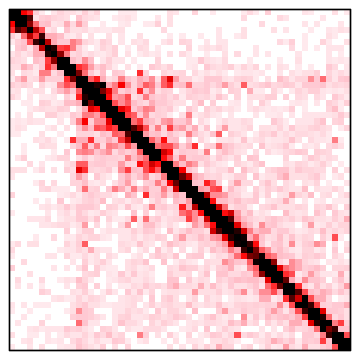

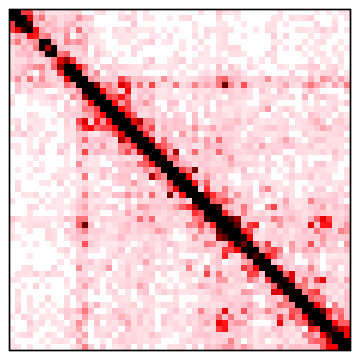

In [117]:
Heatmap(RG.ADRA2A.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(eN.ADRA2A.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

In [104]:
options(repr.plot.width=3,repr.plot.height=3)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr10.20kb:112.6-114.1Mb.ADRA2A.legend:0-18.pdf",width=2,height=2)
Heatmap(RG.ADRA2A.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

In [105]:
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr10.20kb:112.6-114.1Mb.ADRA2A.legend:0-18.pdf",width=2,height=2)
Heatmap(iPC.ADRA2A.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

In [106]:
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr10.20kb:112.6-114.1Mb.ADRA2A.legend:0-18.pdf",width=2,height=2)
Heatmap(eN.ADRA2A.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

In [107]:
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr10.20kb:112.6-114.1Mb.ADRA2A.legend:0-18.pdf",width=2,height=2)
Heatmap(iN.ADRA2A.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

## choose gene

### FMR1: chrX:146.5-160.5

In [155]:
RG.vim.50 <- mySubMat("chrX",146500000,150500000,hRG.50.mat,res=50000)
iPC.vim.50 <- mySubMat("chrX",146500000,150500000,hiPC.50.mat,res=50000)
eN.vim.50 <- mySubMat("chrX",146500000,150500000,heN.50.mat,res=50000)
iN.vim.50 <- mySubMat("chrX",146500000,150500000,hiN.50.mat,res=50000)

In [161]:
RG.vim.oe.50 <- mySubMat("chrX",146500000,150500000,hRG.50.mat.oe,res=50000)
iPC.vim.oe.50 <- mySubMat("chrX",146500000,150500000,hiPC.50.mat.oe,res=50000)
eN.vim.oe.50 <- mySubMat("chrX",146500000,150500000,heN.50.mat.oe,res=50000)
iN.vim.oe.50 <- mySubMat("chrX",146500000,150500000,hiN.50.mat.oe,res=50000)

In [156]:
RG.vim.50[RG.vim.50 >=22] <- 22
eN.vim.50[eN.vim.50 >=20] <- 20
iPC.vim.50[iPC.vim.50 >=20] <- 20
iN.vim.50[iN.vim.50 >=20] <- 20

In [165]:
RG.vim.oe.50[RG.vim.oe.50 >=5] <- 5
eN.vim.oe.50[eN.vim.oe.50 >=5] <- 5
iPC.vim.oe.50[iPC.vim.oe.50 >=5] <- 5
iN.vim.oe.50[iN.vim.oe.50 >=5] <- 5

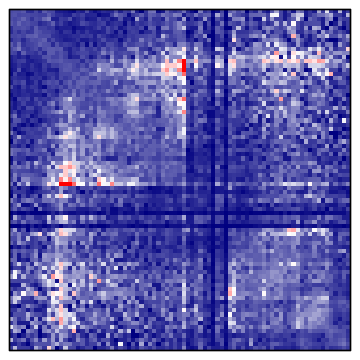

In [166]:
Heatmap(eN.vim.oe.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("navy","white","red"))(500))

In [168]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig4/humanBrain.RG.chrX.50kb:146.5-150.5Mb.FMR1.legend:0-20.pdf",width = 2,height = 2)
Heatmap(RG.vim.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig4/humanBrain.iPC.chrX.50kb:146.5-150.5Mb.FMR1.legend:0-20.pdf",width = 2,height = 2)
Heatmap(iPC.vim.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig4/humanBrain.eN.chrX.50kb:146.5-150.5Mb.FMR1.legend:0-20.pdf",width = 2,height = 2)
Heatmap(eN.vim.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig4/humanBrain.iN.chrX.50kb:146.5-150.5Mb.FMR1.legend:0-20.pdf",width = 2,height = 2)
Heatmap(iN.vim.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

# 20kb / and 10 kb

### KLHL29

In [24]:
RG.k.20 <- mySubMat("chr2",20500000,24000000,hRG.20.mat,res=20000)
iPC.k.20 <- mySubMat("chr2",20500000,24000000,hiPC.20.mat,res=20000)
eN.k.20 <- mySubMat("chr2",20500000,24000000,heN.20.mat,res=20000)
iN.k.20 <- mySubMat("chr2",20500000,24000000,hiN.20.mat,res=20000)

In [25]:
RG.k.20[RG.k.20>7] <- 7
iPC.k.20[iPC.k.20>7] <- 7
eN.k.20[eN.k.20>7] <- 7
iN.k.20[iN.k.20>7] <- 7

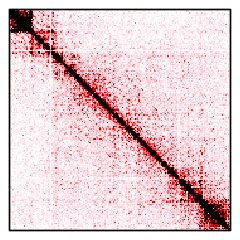

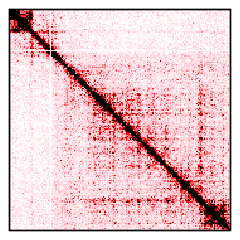

In [28]:
options(repr.plot.width=2,repr.plot.height=2)
Heatmap(RG.k.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

Heatmap(eN.k.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))


###PARD3B chr15

In [72]:
RG.k.20 <- mySubMat("chr2",a,hRG.20.mat,res=20000)
iPC.k.20 <- mySubMat("chr2",204500000,207000000,hiPC.20.mat,res=20000)
eN.k.20 <- mySubMat("chr2",204500000,207000000,heN.20.mat,res=20000)
iN.k.20 <- mySubMat("chr2",204500000,207000000,hiN.20.mat,res=20000)

In [69]:
quantile(RG.k.20,.95)

95% 
7.744346

In [73]:
RG.k.20[RG.k.20>10] <- 10
iPC.k.20[iPC.k.20>10] <- 10
eN.k.20[eN.k.20>10] <- 10
iN.k.20[iN.k.20>10] <- 10

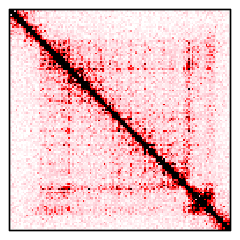

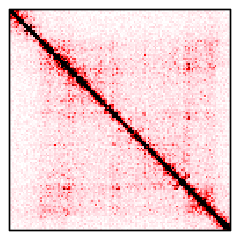

In [74]:
options(repr.plot.width=2,repr.plot.height=2)
Heatmap(RG.k.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

Heatmap(eN.k.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))


### chr15

In [32]:
RG.k.20 <- mySubMat("chr15",35000000,38500000,hRG.20.mat,res=20000)
iPC.k.20 <- mySubMat("chr15",35000000,38500000,hiPC.20.mat,res=20000)
eN.k.20 <- mySubMat("chr15",35000000,38500000,heN.20.mat,res=20000)
iN.k.20 <- mySubMat("chr15",35000000,38500000,hiN.20.mat,res=20000)

In [37]:
RG.k.20[RG.k.20>18] <- 18
iPC.k.20[iPC.k.20>18] <- 18
eN.k.20[eN.k.20>18] <- 18
iN.k.20[iN.k.20>18] <- 18

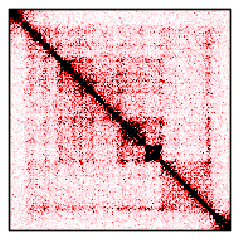

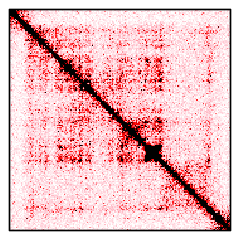

In [38]:
options(repr.plot.width=2,repr.plot.height=2)
Heatmap(RG.k.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

Heatmap(eN.k.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))


## chr13

In [160]:
RG.chr13.20 <- mySubMat("chr13",50000000,52000000,hRG.20.mat,res=20000)
iPC.chr13.20 <- mySubMat("chr13",50000000,52000000,hiPC.20.mat,res=20000)
eN.chr13.20 <- mySubMat("chr13",50000000,52000000,heN.20.mat,res=20000)
iN.chr13.20 <- mySubMat("chr13",50000000,52000000,hiN.20.mat,res=20000)

In [167]:
RG.chr13.20[RG.chr13.20>30] <- 30
iPC.chr13.20[iPC.chr13.20>30] <- 30
eN.chr13.20[eN.chr13.20>30] <- 30
iN.chr13.20[iN.chr13.20>30] <- 30

In [168]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.20kb:50-52Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(RG.chr13.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.20kb:50-52Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iPC.chr13.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.20kb:50-52Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(eN.chr13.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.20kb:50-52Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iN.chr13.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

## AUST2

In [88]:
RG.aust2.20 <- mySubMat("chr7",68900000,70400000,hRG.20.mat,res=20000)
iPC.aust2.20 <- mySubMat("chr7",68900000,70400000,hiPC.20.mat,res=20000)
eN.aust2.20 <- mySubMat("chr7",68900000,70400000,heN.20.mat,res=20000)
iN.aust2.20 <- mySubMat("chr7",68900000,70400000,hiN.20.mat,res=20000)

In [89]:
RG.aust2.20[RG.aust2.20>25] <- 25
eN.aust2.20[eN.aust2.20>25] <- 25
RG.aust2.20[RG.aust2.20<3] <- 3
eN.aust2.20[eN.aust2.20<3] <- 3
iPC.aust2.20[iPC.aust2.20>25] <- 25
iN.aust2.20[iN.aust2.20>25] <- 25
iPC.aust2.20[iPC.aust2.20<3] <- 3
iN.aust2.20[iN.aust2.20<3] <- 3

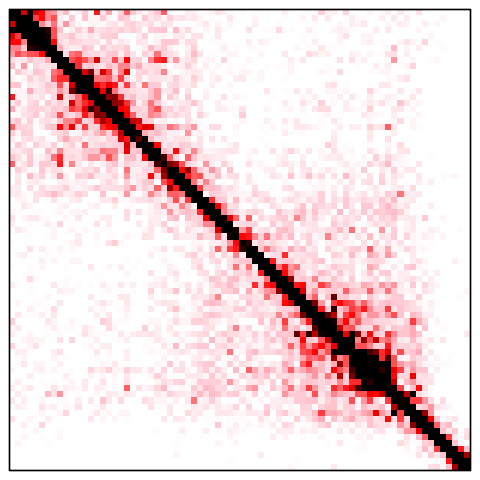

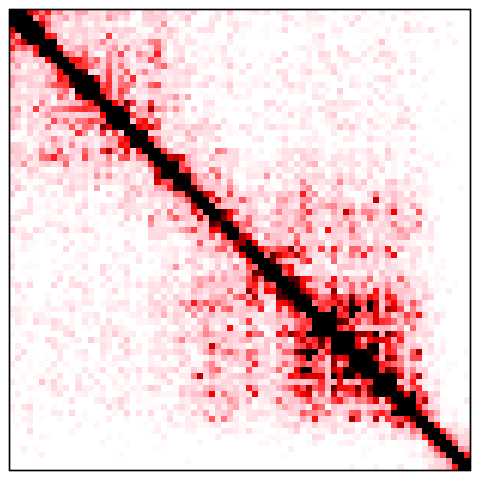

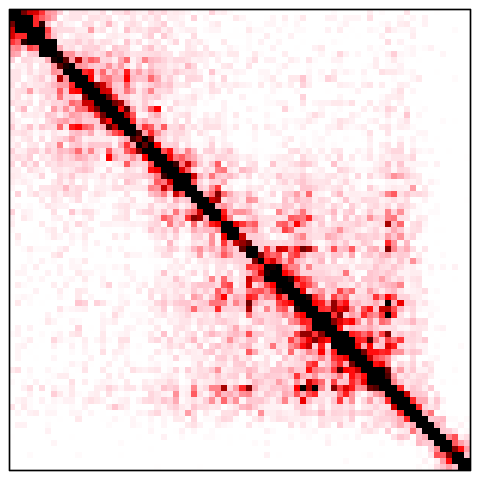

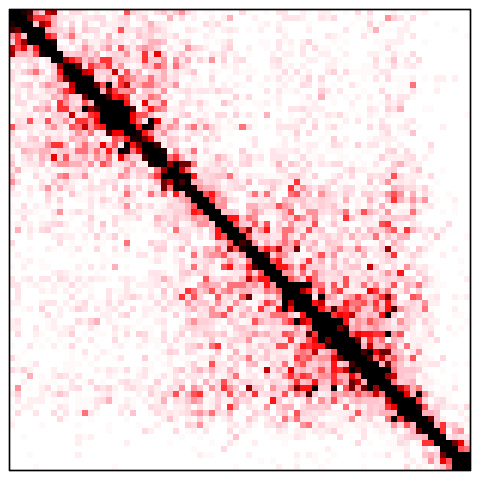

In [99]:
options(repr.plot.width=4,repr.plot.height=4)
Heatmap(RG.aust2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(iPC.aust2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(eN.aust2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(iN.aust2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

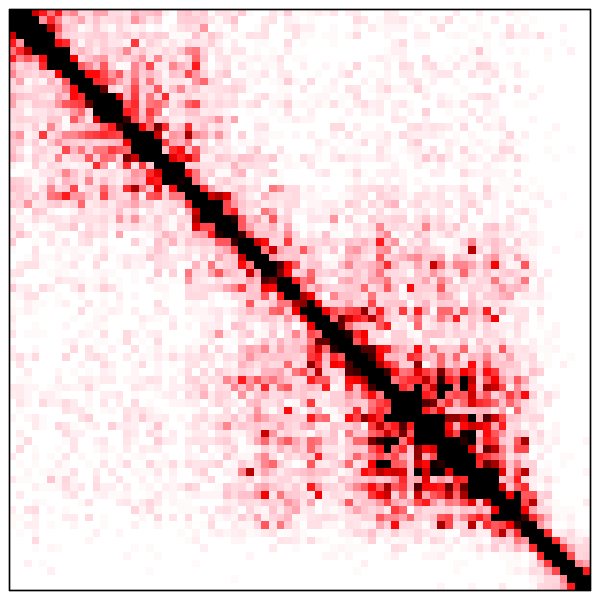

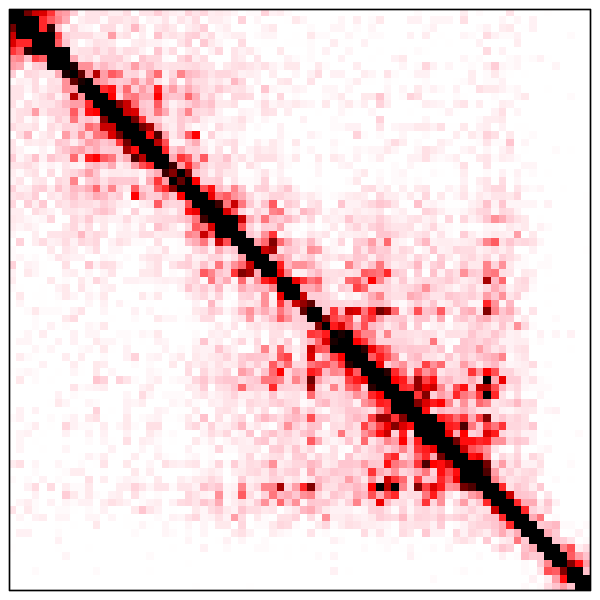

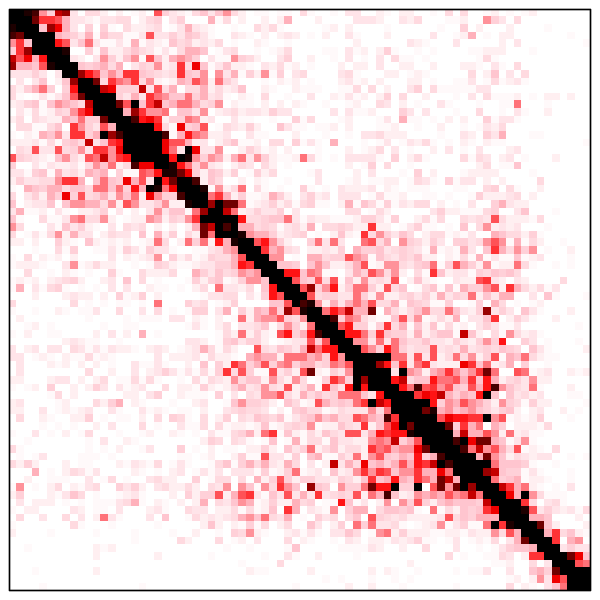

In [168]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.20kb:50-52Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(RG.chr13.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.20kb:50-52Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iPC.chr13.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.20kb:50-52Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(eN.chr13.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.20kb:50-52Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iN.chr13.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

## marker gene

### VIM: chr10:17.2

In [369]:
RG.vim.20 <- mySubMat("chr10",16500000,17700000,hRG.20.mat,res=20000)
iPC.vim.20 <- mySubMat("chr10",16500000,17700000,hiPC.20.mat,res=20000)
eN.vim.20 <- mySubMat("chr10",16500000,17700000,heN.20.mat,res=20000)
iN.vim.20 <- mySubMat("chr10",16500000,17700000,hiN.20.mat,res=20000)

In [370]:
RG.vim.20[RG.vim.20 >=30] <- 30
eN.vim.20[eN.vim.20 >=30] <- 30
iPC.vim.20[iPC.vim.20 >=30] <- 30
iN.vim.20[iN.vim.20 >=30] <- 30

In [373]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr10.20kb:16.5-17.7Mb.VIM.legend:0-30.pdf",width = 2,height = 2)
Heatmap(RG.vim.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr10.20kb:16.5-17.7Mb.VIM.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iPC.vim.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr10.20kb:16.5-17.7Mb.VIM.legend:0-30.pdf",width = 2,height = 2)
Heatmap(eN.vim.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr10.20kb:16.5-17.7Mb.VIM.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iN.vim.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

### SOX2: chr3:181,427,712-181,431,712

In [169]:
RG.sox2.20 <- mySubMat("chr3",180000000,182700000,hRG.20.mat,res=20000)
iPC.sox2.20 <- mySubMat("chr3",180000000,182700000,hiPC.20.mat,res=20000)
eN.sox2.20 <- mySubMat("chr3",180000000,182700000,heN.20.mat,res=20000)
iN.sox2.20 <- mySubMat("chr3",180000000,182700000,hiN.20.mat,res=20000)

In [179]:
RG.sox2.20[RG.sox2.20>10] <- 10
iPC.sox2.20[iPC.sox2.20>10] <- 10
eN.sox2.20[eN.sox2.20>10] <- 10
iN.sox2.20[iN.sox2.20>10] <- 10

In [180]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.20kb:180-182.7Mb.SOX2.legend:0-10.pdf",width = 2,height = 2)
Heatmap(RG.sox2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.20kb:180-182.7Mb.SOX2.legend:0-10.pdf",width = 2,height = 2)
Heatmap(iPC.sox2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.20kb:180-182.7Mb.SOX2.legend:0-10.pdf",width = 2,height = 2)
Heatmap(eN.sox2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.20kb:180-182.7Mb.SOX2.legend:0-10.pdf",width = 2,height = 2)
Heatmap(iN.sox2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

### SATB2:chr2:200,333,989-200337989

In [192]:
RG.satb2.20 <- mySubMat("chr2",199000000,201000000,hRG.20.mat,res=20000)
eN.satb2.20  <- mySubMat("chr2",199000000,201000000,heN.20.mat,res=20000)
iPC.satb2.20  <- mySubMat("chr2",199000000,201000000,hiPC.20.mat,res=20000)
iN.satb2.20  <- mySubMat("chr2",199000000,201000000,hiN.20.mat,res=20000)

In [193]:
RG.satb2.20[RG.satb2.20>8] <- 8
iPC.satb2.20[iPC.satb2.20>8] <- 8
eN.satb2.20[eN.satb2.20>8] <- 8
iN.satb2.20[iN.satb2.20>8] <- 8

In [199]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr2.20kb:199-201Mb.SATB2.legend:0-8.pdf",width = 2,height = 2)
Heatmap(RG.satb2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr2.20kb:199-201Mb.SATB2.legend:0-8.pdf",width = 2,height = 2)
Heatmap(iPC.satb2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr2.20kb:199-201Mb.SATB2.legend:0-8.pdf",width = 2,height = 2)
Heatmap(eN.satb2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr2.20kb:199-201Mb.SATB2.legend:0-8.pdf",width = 2,height = 2)
Heatmap(iN.satb2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

### SSTR2: chr17:71.1Mb

In [378]:
RG.sstr2.20 <- mySubMat("chr17",70300000,71500000,hRG.20.mat,res=20000)
iPC.sstr2.20 <- mySubMat("chr17",70300000,71500000,hiPC.20.mat,res=20000)
eN.sstr2.20 <- mySubMat("chr17",70300000,71500000,heN.20.mat,res=20000)
iN.sstr2.20 <- mySubMat("chr17",70300000,71500000,hiN.20.mat,res=20000)

In [379]:
RG.sstr2.20[RG.sstr2.20 >=45] <- 45
eN.sstr2.20[eN.sstr2.20 >=45] <- 45
iPC.sstr2.20[iPC.sstr2.20 >=45] <- 45
iN.sstr2.20[iN.sstr2.20 >=45] <- 45

In [382]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr17.20kb:70.3-71.5Mb.SSTR2.legend:0-45.pdf",width = 2,height = 2)
Heatmap(RG.sstr2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr17.20kb:70.3-71.5Mb.SSTR2.legend:0-45.pdf",width = 2,height = 2)
Heatmap(iPC.sstr2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr17.20kb:70.3-71.5Mb.SSTR2.legend:0-45.pdf",width = 2,height = 2)
Heatmap(eN.sstr2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr17.20kb:70.3-71.5Mb.SSTR2.legend:0-45.pdf",width = 2,height = 2)
Heatmap(iN.sstr2.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

### GAD1: chr2:171.7Mb

In [250]:
RG.gad1.20 <- mySubMat("chr2",170500000,172500000,hRG.20.mat,res=20000)
iPC.gad1.20 <- mySubMat("chr2",170500000,172500000,hiPC.20.mat,res=20000)
eN.gad1.20 <- mySubMat("chr2",170500000,172500000,heN.20.mat,res=20000)
iN.gad1.20 <- mySubMat("chr2",170500000,172500000,hiN.20.mat,res=20000)

In [251]:
RG.gad1.20[RG.gad1.20 >=8] <- 8
eN.gad1.20[eN.gad1.20 >=8] <- 8
iPC.gad1.20[iPC.gad1.20 >=8] <- 8
iN.gad1.20[iN.gad1.20 >=8] <- 8

In [254]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr2.20kb:170.5-172.5Mb.GAD1.legend:0-8.pdf",width = 2,height = 2)
Heatmap(RG.gad1.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr2.20kb:170.5-172.5Mb.GAD1.legend:0-8.pdf",width = 2,height = 2)
Heatmap(iPC.gad1.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr2.20kb:170.5-172.5Mb.GAD1.legend:0-8.pdf",width = 2,height = 2)
Heatmap(eN.gad1.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr2.20kb:170.5-172.5Mb.GAD1.legend:0-8.pdf",width = 2,height = 2)
Heatmap(iN.gad1.20,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

# scRNA

In [69]:
scRNA <- readRDS("../../../FINAL_RDS/humanBrain_neuron_2021/human_neocortex_raw_Seurat.analyzed.RDS")

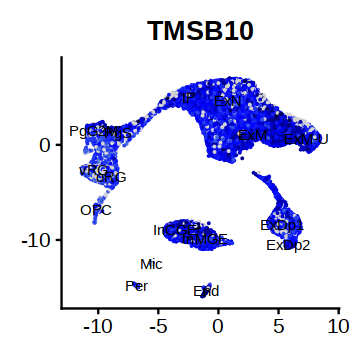

In [9]:
FeaturePlot(scRNA, features = c("TMSB10"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())

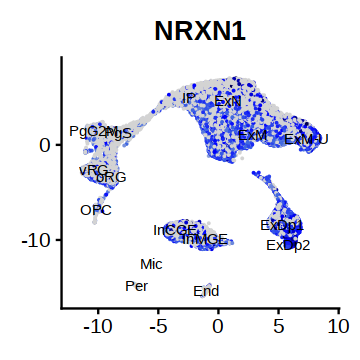

In [10]:
FeaturePlot(scRNA, features = c("NRXN1"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())

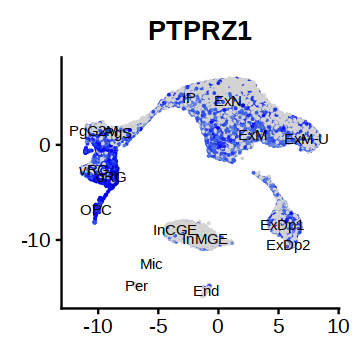

In [109]:
FeaturePlot(scRNA, features = c("PTPRZ1"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())

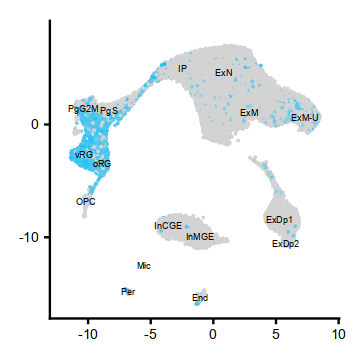

In [118]:
options(repr.plot.width=3,repr.plot.height=3)
FeaturePlot(scRNA, features = c("VIM"),label = T,label.size = 1.8,
            cols = colorRampPalette(c("lightgray","deepskyblue"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank(),
      plot.title=element_blank(),axis.text.x=element_text(size=8),axis.text.y=element_text(size=8))
ggsave("../../../FINAL_figures/fig1/Version2/humanBrain_pub_scRNA_VIM.pdf",width=1.5,height=1.5)

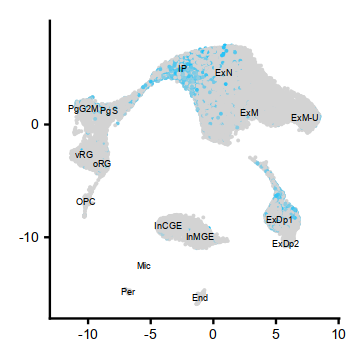

In [119]:
options(repr.plot.width=3,repr.plot.height=3)
FeaturePlot(scRNA, features = c("SSTR2"),label = T,label.size = 1.8,
            cols = colorRampPalette(c("lightgray","deepskyblue"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank(),
      plot.title=element_blank(),axis.text.x=element_text(size=8),axis.text.y=element_text(size=8))
ggsave("../../../FINAL_figures/fig1/Version2/humanBrain_pub_scRNA_SSTR2.pdf",width=1.5,height=1.5)

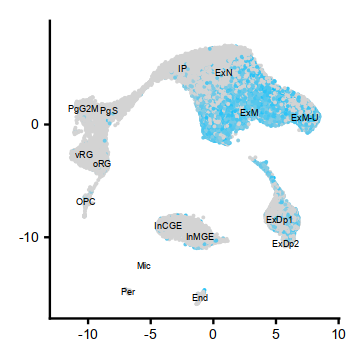

In [120]:
options(repr.plot.width=3,repr.plot.height=3)
FeaturePlot(scRNA, features = c("SATB2"),label = T,label.size = 1.8,
            cols = colorRampPalette(c("lightgray","deepskyblue"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank(),
      plot.title=element_blank(),axis.text.x=element_text(size=8),axis.text.y=element_text(size=8))
ggsave("../../../FINAL_figures/fig1/Version2/humanBrain_pub_scRNA_SATB2.pdf",width=1.5,height=1.5)

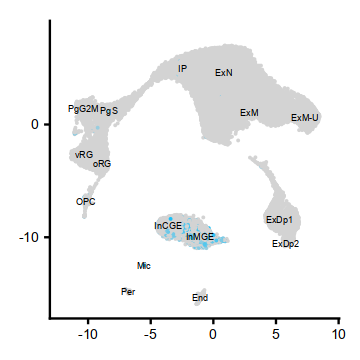

In [121]:
options(repr.plot.width=3,repr.plot.height=3)
FeaturePlot(scRNA, features = c("GAD1"),label = T,label.size = 1.8,
            cols = colorRampPalette(c("lightgray","deepskyblue"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank(),
      plot.title=element_blank(),axis.text.x=element_text(size=8),axis.text.y=element_text(size=8))
ggsave("../../../FINAL_figures/fig1/Version2/humanBrain_pub_scRNA_GAD1.pdf",width=1.5,height=1.5)

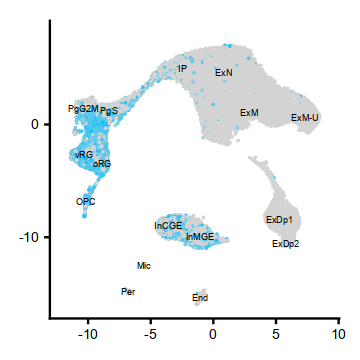

In [117]:
options(repr.plot.width=3,repr.plot.height=3)
FeaturePlot(scRNA, features = c("SOX2"),label = T,label.size = 1.8,
            cols = colorRampPalette(c("lightgray","deepskyblue"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank(),
      plot.title=element_blank(),axis.text.x=element_text(size=8),axis.text.y=element_text(size=8))
ggsave("../../../FINAL_figures/fig1/Version2/humanBrain_pub_scRNA_SOX2.pdf",width=1.5,height=1.5)

In [454]:
options(repr.plot.width = 3, repr.plot.height = 3)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.VIM.scRNA.pdf",width = 2.3,height = 2.3)
FeaturePlot(scRNA, features = c("VIM"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())
dev.off()

png 
  2

In [457]:
options(repr.plot.width = 3.3, repr.plot.height = 3)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.SSTR2.scRNA.pdf",width = 2.3,height = 2.3)
FeaturePlot(scRNA, features = c("SSTR2"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())
dev.off()

png 
  2

In [458]:
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.SATB2.scRNA.pdf",width = 2.3,height = 2.3)
FeaturePlot(scRNA, features = c("SATB2"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())
dev.off()

png 
  2

In [459]:
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.GAD1.scRNA.pdf",width = 2.3,height = 2.3)
FeaturePlot(scRNA, features = c("GAD1"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())
dev.off()

png 
  2

In [460]:
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.SOX2.scRNA.pdf",width = 2.3,height = 2.3)
FeaturePlot(scRNA, features = c("SOX2"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())
dev.off()

png 
  2

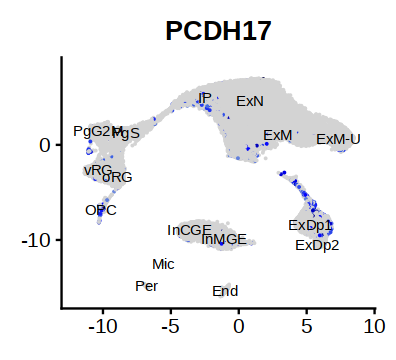

In [463]:
#pdf("../../../FINAL_figures/fig1/Version2/humanBrain.SOX2.scRNA.pdf",width = 2.3,height = 2.3)
FeaturePlot(scRNA, features = c("PCDH17"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())
#dev.off()

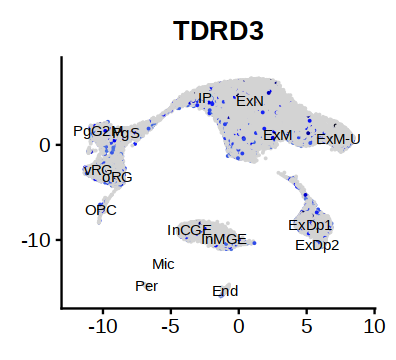

In [469]:
#pdf("../../../FINAL_figures/fig1/Version2/humanBrain.SOX2.scRNA.pdf",width = 2.3,height = 2.3)
FeaturePlot(scRNA, features = c("TDRD3"),label = T,label.size = 3,
            cols = colorRampPalette(c("lightgray","royalblue","blue","black"))(500))+
theme(legend.position = "none",axis.title.x = element_blank(),axis.title.y = element_blank())
#dev.off()

# 50kr hic CN

In [223]:
CN.50 <- lapply(13:13,function(idx){
    read.table(paste0("../../rawMAT/humanBrain_1k_PFCV1_merge/CN.allValidPairs.hic.rawMAT/CN.allValidPairs.hic_",idx,"_KR.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
ES.50 <- lapply(13:13,function(idx){
    read.table(paste0("../../rawMAT/humanBrain_1k_PFCV1_merge/human.hic.ESC.allValidPairs.hic.rawMAT/human.hic.ESC.allValidPairs.hic_",idx,"_KR.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [224]:
CN.10 <- lapply(13:13,function(idx){
    read.table(paste0("../../rawMAT/humanBrain_1k_PFCV1_merge/CN.allValidPairs.hic.rawMAT/CN.allValidPairs.hic_",idx,"_KR.10kb.mat")) %>%
    mutate(seqnames=idx) 
})
ES.10 <- lapply(13:13,function(idx){
    read.table(paste0("../../rawMAT/humanBrain_1k_PFCV1_merge/human.hic.ESC.allValidPairs.hic.rawMAT/human.hic.ESC.allValidPairs.hic_",idx,"_KR.10kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [225]:
CN.25 <- lapply(13:13,function(idx){
    read.table(paste0("../../rawMAT/humanBrain_1k_PFCV1_merge/CN.allValidPairs.hic.rawMAT/CN.allValidPairs.hic_",idx,"_KR.25kb.mat")) %>%
    mutate(seqnames=idx) 
})
ES.25 <- lapply(13:13,function(idx){
    read.table(paste0("../../rawMAT/humanBrain_1k_PFCV1_merge/human.hic.ESC.allValidPairs.hic.rawMAT/human.hic.ESC.allValidPairs.hic_",idx,"_KR.25kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [226]:
CN.50.mat <- do.call(rbind,CN.50) %>% mutate(seqnames=paste0("chr",seqnames))
CN.25.mat <- do.call(rbind,CN.25) %>% mutate(seqnames=paste0("chr",seqnames))
CN.10.mat <- do.call(rbind,CN.10) %>% mutate(seqnames=paste0("chr",seqnames))
ES.50.mat <- do.call(rbind,ES.50) %>% mutate(seqnames=paste0("chr",seqnames))
ES.25.mat <- do.call(rbind,ES.25) %>% mutate(seqnames=paste0("chr",seqnames))
ES.10.mat <- do.call(rbind,ES.10) %>% mutate(seqnames=paste0("chr",seqnames))

In [227]:
CN.50.mat$V3[is.na(CN.50.mat$V3)] <- 0
CN.25.mat$V3[is.na(CN.25.mat$V3)] <- 0
CN.10.mat$V3[is.na(CN.10.mat$V3)] <- 0
ES.50.mat$V3[is.na(ES.50.mat$V3)] <- 0
ES.25.mat$V3[is.na(ES.25.mat$V3)] <- 0
ES.10.mat$V3[is.na(ES.10.mat$V3)] <- 0

In [228]:
CN.50.mat$V3 <- CN.50.mat$V3/sum(CN.50.mat$V3) * 4000000
ES.50.mat$V3 <- ES.50.mat$V3/sum(ES.50.mat$V3) * 4000000
CN.25.mat$V3 <- CN.25.mat$V3/sum(CN.25.mat$V3) * 4000000
ES.25.mat$V3 <- ES.25.mat$V3/sum(ES.25.mat$V3) * 4000000
CN.10.mat$V3 <- CN.10.mat$V3/sum(CN.10.mat$V3) * 4000000
ES.10.mat$V3 <- ES.10.mat$V3/sum(ES.10.mat$V3) * 4000000

In [229]:
CN.chr13.50 <- mySubMat("chr13",50000000,65000000,CN.50.mat,res=50000)
ES.chr13.50 <- mySubMat("chr13",50000000,65000000,ES.50.mat,res=50000)

In [230]:
CN.chr13.25 <- mySubMat("chr13",50000000,52000000,CN.25.mat,res=25000)
ES.chr13.25 <- mySubMat("chr13",50000000,52000000,ES.25.mat,res=25000)

In [231]:
CN.chr13.10 <- mySubMat("chr13",50000000,52000000,CN.10.mat,res=10000)
ES.chr13.10 <- mySubMat("chr13",50000000,52000000,ES.10.mat,res=10000)

In [251]:
quantile(CN.chr13.50,.95)

95% 
40.38002

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


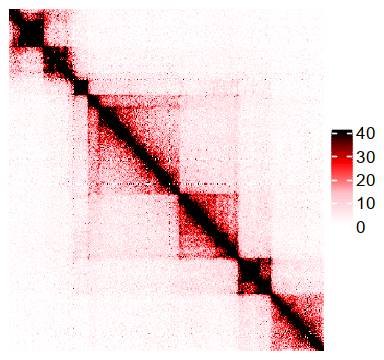

In [252]:
#pdf("../../../FINAL_figures/fig1/humanCN.hic.chr13.50-60Mb.50kb.pdf",width=2.2,height=1.8)
ComplexHeatmap::pheatmap(CN.chr13.50,fontsize = 8,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(0.2,40),
                         cluster_cols = F,cluster_rows = F,border = NA)
#dev.off()

In [247]:
pdf("../../../FINAL_figures/fig1/humanES.hic.chr13.50-60Mb.50kb.pdf",width=2.2,height=1.8)
ComplexHeatmap::pheatmap(ES.chr13.50,fontsize = 8,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(0.2,30),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [249]:
pdf("../../../FINAL_figures/fig1/humanCN.hic.chr13.50-52Mb.20kb.pdf",width=2.2,height=1.8)
ComplexHeatmap::pheatmap(CN.chr13.25,fontsize = 8,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(4,quantile(CN.chr13.25,.95)),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

In [250]:
pdf("../../../FINAL_figures/fig1/humanES.hic.chr13.50-52Mb.20kb.pdf",width=2.2,height=1.8)
ComplexHeatmap::pheatmap(ES.chr13.25,fontsize = 8,
                         #color=viridis::turbo(500,direction = 1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(4,quantile(ES.chr13.25,.955)),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


png 
  2

# all human reads

In [ ]:
RG.all.h <- readRDS("../../../DYnamic.comp.and.peak/humanBrian_PFC/obsEXP.mat/RG.50.mat.RDS")
eN.all.h <- readRDS("../../../DYnamic.comp.and.peak/humanBrian_PFC/obsEXP.mat/eN.50.mat.RDS")

In [ ]:
rawRG.50 <- lapply(1:22,function(idx){
    read.table(paste0("../../../DYnamic.comp.and.peak/humanBrian_PFC/rawMAT/RG.all.allValidPairs.hic.rawMAT/RG.all.allValidPairs.hic_",idx,"_raw.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
raweN.50 <- lapply(1:22,function(idx){
    read.table(paste0("../../../DYnamic.comp.and.peak/humanBrian_PFC/rawMAT/eN.all.allValidPairs.hic.rawMAT/eN.all.allValidPairs.hic_",idx,"_raw.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [ ]:
rawRG.50.mat <- do.call(rbind,rawRG.50) %>% mutate(seqnames=paste0("chr",seqnames))
raweN.50.mat <- do.call(rbind,raweN.50) %>% mutate(seqnames=paste0("chr",seqnames))

In [ ]:
saveRDS(rawRG.50.mat,"../../../DYnamic.comp.and.peak/humanBrian_PFC/rawMAT/RG.50kb.rawmat.RDS")
saveRDS(raweN.50.mat,"../../../DYnamic.comp.and.peak/humanBrian_PFC/rawMAT/eN.50kb.rawmat.RDS")

In [ ]:
h.chr13.stripes.RG=mySubMat("chr13",52000000,62000000,rawRG.50.mat,res=50000)
h.chr13.stripes.eN=mySubMat("chr13",52000000,62000000,raweN.50.mat,res=50000)

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/fig1/allreads/humanBrain_1K_RG.chr13:52000000-62000000.50kb.pdf",width=2.1,height=1.8)
ComplexHeatmap::pheatmap(h.chr13.stripes.RG,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(2,20),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/fig1/allreads/humanBrain_1K_eN.chr13:52000000-62000000.50kb.pdf",width=2.1,height=1.8)
ComplexHeatmap::pheatmap(h.chr13.stripes.eN,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(2,20),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

In [ ]:
h.chr14.stripes.RG=mySubMat("chr14",37000000,47000000,rawRG.50.mat,res=50000)
h.chr14.stripes.eN=mySubMat("chr14",37000000,47000000,raweN.50.mat,res=50000)

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/fig1/allreads/humanBrain_1K_RG.chr14:37000000-47000000.50kb.pdf",width=2.1,height=1.8)
ComplexHeatmap::pheatmap(h.chr14.stripes.RG,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(2,20),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
pdf("../../../../FINAL_figures/fig1/allreads/humanBrain_1K_eN.chr14:37000000-47000000.50kb.pdf",width=2.1,height=1.8)
ComplexHeatmap::pheatmap(h.chr14.stripes.eN,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(2,20),
                         cluster_cols = F,cluster_rows = F,border = NA) 
dev.off()

In [ ]:
h.chr18.stripes.RG=mySubMat("chr18",60000000,70000000,rawRG.50.mat,res=50000)
h.chr18.stripes.eN=mySubMat("chr18",60000000,70000000,raweN.50.mat,res=50000)

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(h.chr18.stripes.eN,fontsize = 8,
                         color=viridis::rocket(500,direction = -1),
                         breaks=c(3,18),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(h.chr18.stripes.RG,fontsize = 8,
                         color=viridis::rocket(500,direction = -1),
                         breaks=c(3,18),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

In [ ]:
h.chr5.stripes.RG=mySubMat("chr5",80000000,90000000,rawRG.50.mat,res=50000)
h.chr5.stripes.eN=mySubMat("chr5",80000000,90000000,raweN.50.mat,res=50000)

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(h.chr5.stripes.eN,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(0,23),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(h.chr5.stripes.RG,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(0,23),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

# 10kb loops

In [ ]:
rawRG.10 <- lapply(c(2,3,5),function(idx){
    read.table(paste0("../../../DYnamic.comp.and.peak/humanBrian_PFC/rawMAT/RG.all.allValidPairs.hic.rawMAT/RG.all.allValidPairs.hic_",idx,"_KR.10kb.mat")) %>%
    mutate(seqnames=idx) 
})
raweN.10 <- lapply(c(2,3,5),function(idx){
    read.table(paste0("../../../DYnamic.comp.and.peak/humanBrian_PFC/rawMAT/eN.all.allValidPairs.hic.rawMAT/eN.all.allValidPairs.hic_",idx,"_KR.10kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [ ]:
rawRG.mat <- do.call(rbind,rawRG.10) %>% mutate(seqnames=paste0("chr",seqnames))
raweN.mat <- do.call(rbind,raweN.10) %>% mutate(seqnames=paste0("chr",seqnames))

In [ ]:
h.chr5.10kb.stripes.RG=mySubMat("chr5",86900000,88200000,rawRG.mat,res=10000)
h.chr5.10kb.stripes.eN=mySubMat("chr5",86900000,88200000,rawRG.mat,res=10000)

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(h.chr5.10kb.stripes.RG,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(0.5,6),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(h.chr5.10kb.stripes.eN,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(0.5,6),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

In [ ]:
# SOX2: chr3:181,427,712-181,431,712

In [ ]:
h.chr2.10kb.stripes.RG=mySubMat("chr2",161800000,163200000,rawRG.mat,res=10000)
h.chr2.10kb.stripes.eN=mySubMat("chr2",161800000,163200000,raweN.mat,res=10000)

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(h.chr2.10kb.stripes.RG,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(0.5,6),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
#pdf("../../../../FINAL_figures/macacaBrain_1K_RG.chr2:84500000-88500000.50kb.sox2.pdf",width=2.3,height=1.8)
ComplexHeatmap::pheatmap(h.chr2.10kb.stripes.eN,fontsize = 8,
                         #color=viridis::rocket(500,direction = -1),
                         color=colorRampPalette(c("white","pink","red","black"))(500),
                         breaks=c(0.5,6),
                         cluster_cols = F,cluster_rows = F,border = NA) 
#dev.off()